In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Path to the dataset
data_path = "/Users/devambani/Projects/data-science-pipeline/NewsSnap_quick_digestable_news_summaries/bbc-dataset"

data = []
labels = []

# Load data from each folder
for label in os.listdir(data_path):
    folder_path = os.path.join(data_path, label)
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
                data.append(text)
                labels.append(label)

# Create a DataFrame
df = pd.DataFrame({'text': data, 'label': labels})

In [3]:
# Split the data into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

In [4]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit the vectorizer on the training data and transform both train and test sets
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

In [5]:
# Encode labels as numeric values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_labels)
y_test = label_encoder.transform(test_labels)

In [6]:
# Train a Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [7]:
# Predict on the test set
y_pred = lr_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Print detailed classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Test Accuracy: 97.98%
               precision    recall  f1-score   support

     business       0.97      0.97      0.97       103
entertainment       1.00      0.96      0.98        84
     politics       0.95      0.99      0.97        80
        sport       1.00      0.99      0.99        98
         tech       0.98      0.99      0.98        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



In [9]:
# Test the model with a single example
example_text = "The team played well and won the match"
example_vector = vectorizer.transform([example_text])  # Transform the example text

# Predict the label
predicted_label_index = lr_classifier.predict(example_vector)[0]
predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]

print(f"Example Text: {example_text}")
print(f"Predicted Label: {predicted_label}")

Example Text: The team played well and won the match
Predicted Label: sport


In [20]:
%pip install matplotlib seaborn WordCloud

Note: you may need to restart the kernel to use updated packages.


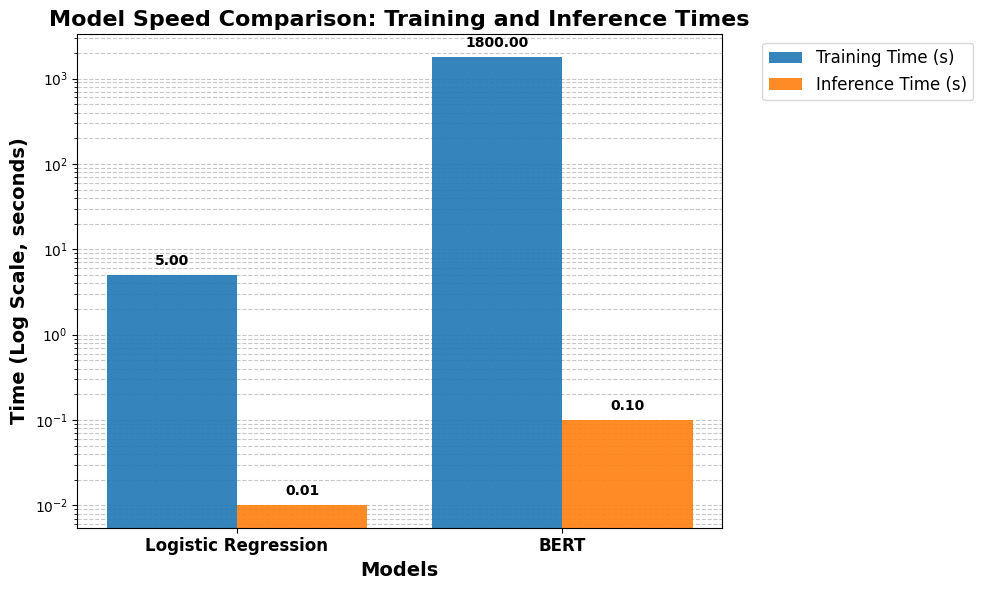

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data for training and inference times (in seconds)
models = ['Logistic Regression', 'BERT']
training_time = [5, 1800]  # Training times: Logistic Regression ~5s, BERT ~1800s (30 min)
inference_time = [0.01, 0.1]  # Inference times: Logistic Regression ~0.01s, BERT ~0.1s

# Bar width and positions
x = np.arange(len(models))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))

# Plot training and inference times using a logarithmic scale
bars1 = ax.bar(x - width/2, training_time, width, label='Training Time (s)', color='#1f77b4', alpha=0.9)
bars2 = ax.bar(x + width/2, inference_time, width, label='Inference Time (s)', color='#ff7f0e', alpha=0.9)

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Annotate bars with values (formatted for logarithmic clarity)
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # Offset above the bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black', weight='bold')

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=14, weight='bold')
ax.set_ylabel('Time (Log Scale, seconds)', fontsize=14, weight='bold')
ax.set_title('Model Speed Comparison: Training and Inference Times', fontsize=16, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12, weight='bold')
ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1.05, 1))

# Add gridlines for readability
ax.yaxis.grid(True, which="both", linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Adjust layout
plt.tight_layout()
plt.show()

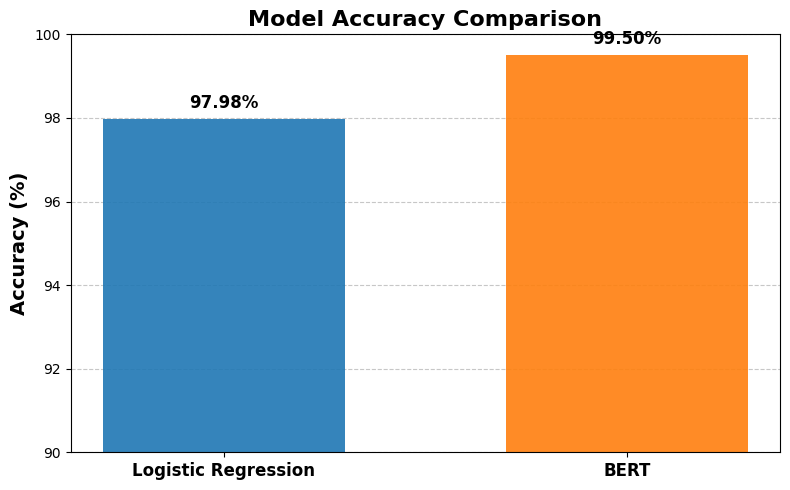

In [14]:
import matplotlib.pyplot as plt

# Data for accuracy
models = ['Logistic Regression', 'BERT']
accuracies = [97.98, 99.50]  # Actual and hypothetical accuracies

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(models, accuracies, color=['#1f77b4', '#ff7f0e'], alpha=0.9, width=0.6)

# Add annotations to bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # Offset above the bar
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12, weight='bold')

# Add labels and title
ax.set_ylabel('Accuracy (%)', fontsize=14, weight='bold')
ax.set_title('Model Accuracy Comparison', fontsize=16, weight='bold')
ax.set_ylim(90, 100)  # Set y-axis range for better visibility
ax.set_xticks(range(len(models)))
ax.set_xticklabels(models, fontsize=12, weight='bold')

# Add gridlines for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Adjust layout and show
plt.tight_layout()
plt.show()

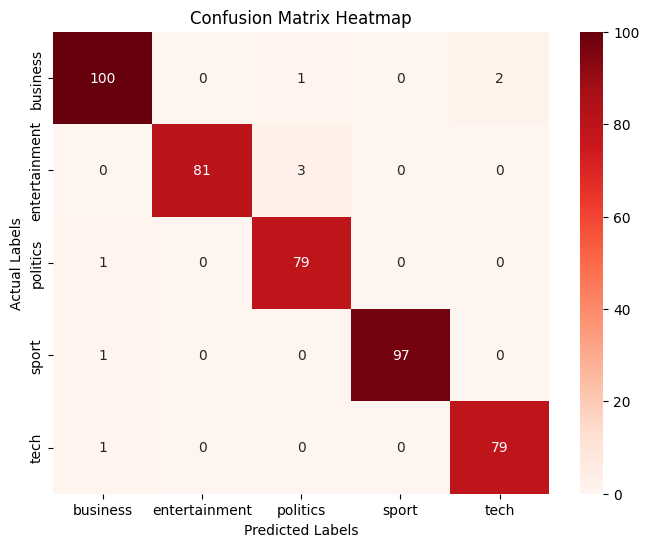

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

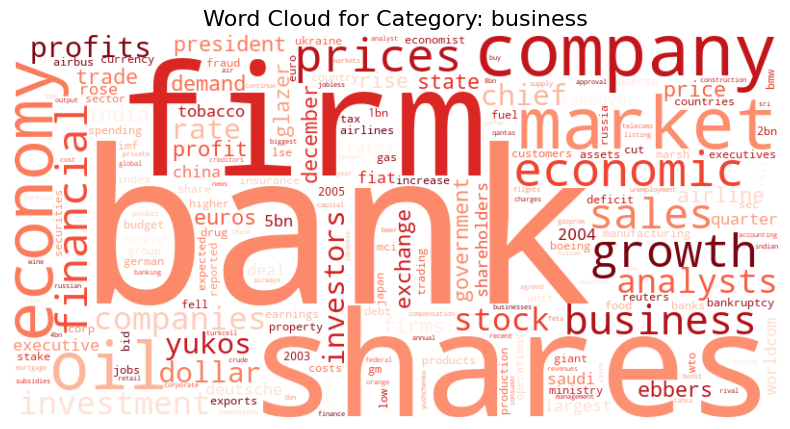

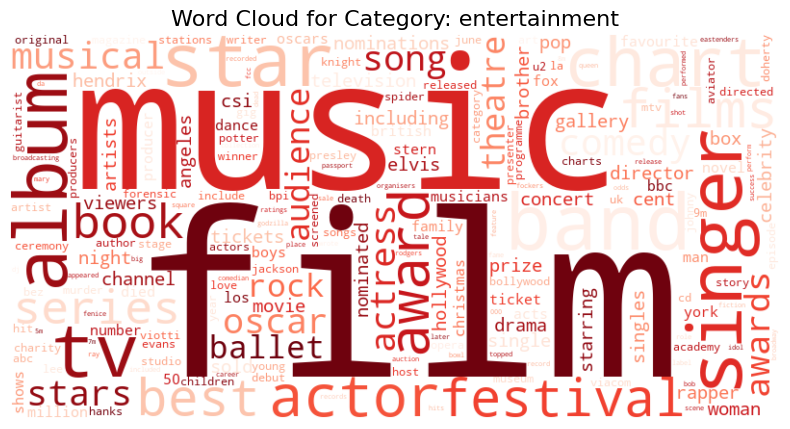

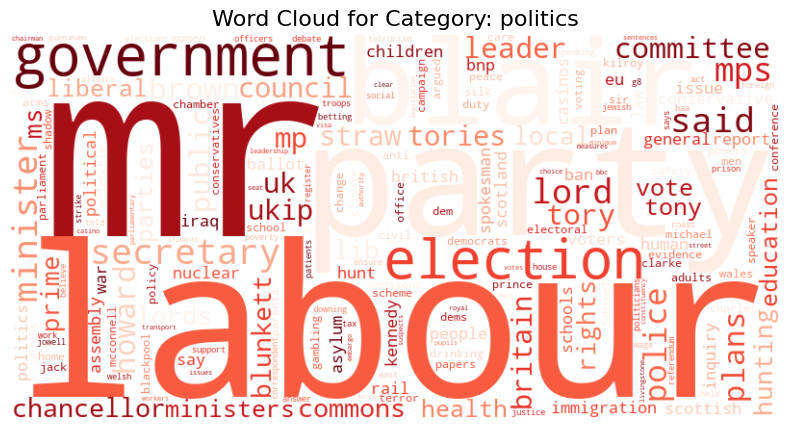

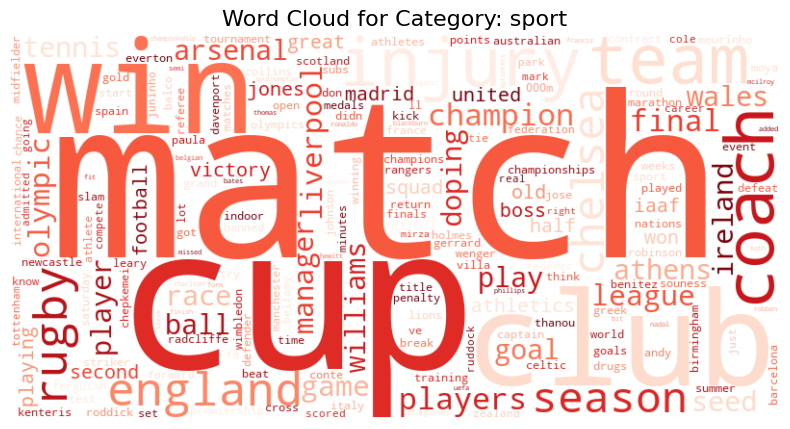

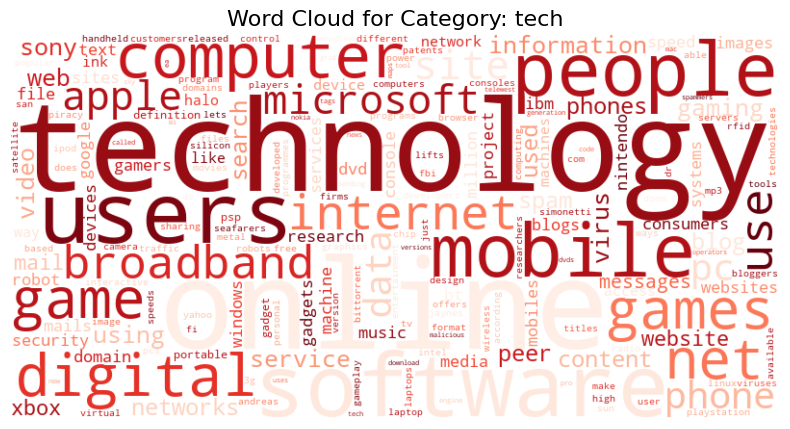

In [21]:
from wordcloud import WordCloud
import numpy as np

# Extract feature names and coefficients from Logistic Regression
feature_names = np.array(vectorizer.get_feature_names_out())
coefficients = lr_classifier.coef_

# Create a word cloud for each category
for i, category in enumerate(label_encoder.classes_):
    # Get coefficients for the current category
    category_coefficients = coefficients[i]
    
    # Map features to their corresponding weights
    word_weights = {word: weight for word, weight in zip(feature_names, category_coefficients)}
    
    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(word_weights)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Category: {category}', fontsize=16)
    plt.show()